In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties
import seaborn as sns
import numpy as np
import nbimporter

import tcf as tcf

## Simulation Parameters

In [3]:
mass = 1836 #mass of proton in a.u.
wb = 0.0023 #500 cm^-1 converted to a.u.
V0 = 0.0068 #1500 cm^1 converted to a.u.
# V0 = 0.0032 #700 cm^1
L = 30 #grid length in a.u.
beta = 900 #inverse temperature in a.u.; 1/beta = 350 K convert to a.u
t = 7000 #simulation time in a.u.

n = 8 #number of qubits
steps = 100 #number of time steps

cutoff = 35 #eigenvalue cutoff

D = np.power(2, n)
dx = L/D
dt = t/steps    
x = np.linspace(-L/2.0, L/2.0, D)

## Generates Exact Results

In [4]:
exact = np.zeros(steps,dtype='complex')
D_exact = 400 #use a larger dimension for exact results to ensure high accuracy

for i in range(steps):
    t_i = i * dt
    exact[i] = tcf.cxx_exact_sdw(mass, wb, V0, L, D_exact, t_i, beta, cutoff)

## Generates data for Figure 3a

In [5]:
## Run Steps Error Study
hpimc_dt_100 = tcf.cxx_sdw(mass,wb,V0,L,D,100,t,beta,D,'qft','dvr')
hpimc_dt_75 = tcf.cxx_sdw(mass,wb,V0,L,D,75,t,beta,D,'qft','dvr')
hpimc_dt_50 = tcf.cxx_sdw(mass,wb,V0,L,D,50,t,beta,D,'qft','dvr')
hpimc_dt_40 = tcf.cxx_sdw(mass,wb,V0,L,D,40,t,beta,D,'qft','dvr')
hpimc_dt_30 = tcf.cxx_sdw(mass,wb,V0,L,D,30,t,beta,D,'qft','dvr')

## Gemerates data for Figure 3b

In [6]:
#DVR truncation parameter l
l2 = int(D/2)
l4 = int(l2 - D/4)
l8 = int(l4 - D/8)
l16 = int(l8 - D/16)
l32 = int(l16 - D/32)

hpimc_trunc_2 = tcf.cxx_sdw(mass, wb, V0, L, D, steps, t, beta, l2,'qft','dvr')
hpimc_trunc_4 = tcf.cxx_sdw(mass, wb, V0, L, D, steps, t, beta, l4,'qft','dvr')
hpimc_trunc_8 = tcf.cxx_sdw(mass, wb, V0, L, D, steps, t, beta, l8,'qft','dvr')
hpimc_trunc_16 = tcf.cxx_sdw(mass, wb, V0, L, D, steps, t, beta,l16,'qft','dvr')
hpimc_trunc_32 = tcf.cxx_sdw(mass, wb, V0, L, D, steps, t, beta,l32,'qft','dvr')

## Gemerates data for Figure 3c

In [7]:
hpimc_disc_7 = tcf.cxx_sdw(mass,wb,V0,L,np.power(2,7),steps,t,beta,np.power(2,7),'qft','dvr')
hpimc_disc_6 = tcf.cxx_sdw(mass,wb,V0,L,np.power(2,6),steps,t,beta,np.power(2,6),'qft','dvr')
hpimc_disc_5 = tcf.cxx_sdw(mass,wb,V0,L,np.power(2,5),steps,t,beta,np.power(2,5),'qft','dvr')

## Generates data for Figure 4c

In [9]:
my_dim = np.power(2,6)
hpimc_opt = tcf.cxx_sdw(mass,wb,V0,L,my_dim,40,t,beta,int(my_dim/2  - my_dim/4 - my_dim/8 - my_dim/16),'qft','dvr')

## Combines subfigures and creates Figure 3

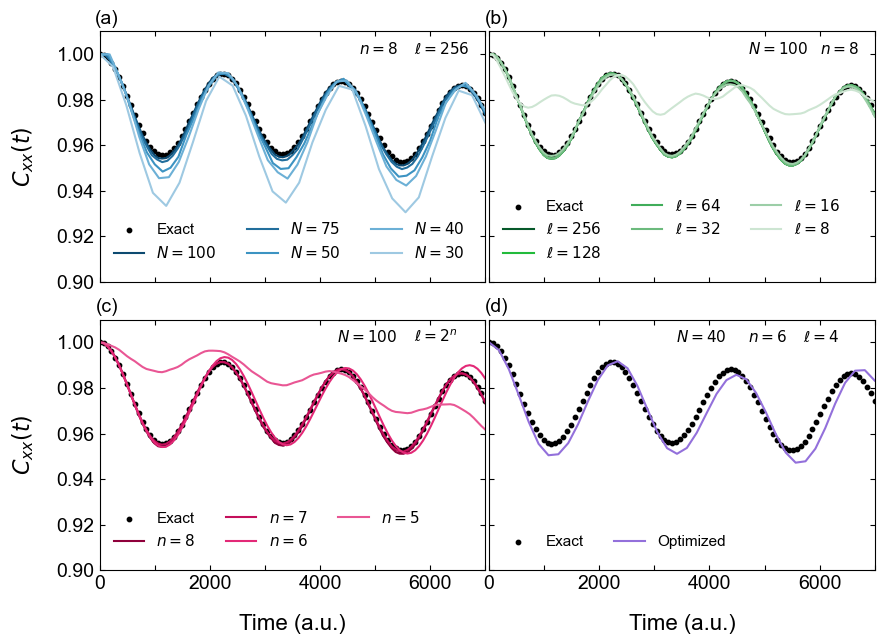

In [10]:
fig, axes = plt.subplots(2,2,figsize=(10,7))

t = 7000

t_100 = np.linspace(0,t,100)
t_75 = np.linspace(0,t,75)
t_50 = np.linspace(0,t,50)
t_40 = np.linspace(0,t,40)
t_30 = np.linspace(0,t,30)

my_times = np.array([t_100,t_75,t_50,t_40,t_30],dtype='object')
my_corrs = np.array([hpimc_dt_100,hpimc_dt_75,hpimc_dt_50,hpimc_dt_40,hpimc_dt_30],dtype='object')

my_labels_steps = ["$N=100$","$N=75$","$N=50$","$N=40$","$N=30$"]
my_labels_trunc = ["$\ell=256$","$\ell=128$","$\ell=64$","$\ell=32$","$\ell=16$","$\ell=8$"]
my_labels_disc = ["$n=8$","$n=7$","$n=6$","$n=5$"]

colors_blue = ['#0d4a70', '#226e9c','#3c93c2','#6cb0d6','#9ec9e2']
colors_green = ['#06592a','#22bb3b','#40ad5a','#6cba7d','#9ccea7','#cde5d2']
colors_red = ['#8f003b','#c40f5b','#e32977','#e95694']
colors_purple = ['#9370DB']

sns.set_palette("colorblind")
matplotlib.rc('font',family='Arial')

#steps plots
axes[0,0].scatter(t_100,np.real(exact)/np.amax(np.real(exact)),color='black',s=10,label='Exact')
for j in range(5):
    axes[0,0].plot(my_times[j],np.real(my_corrs[j])/np.amax(np.real(my_corrs[j])),color=colors_blue[j],label=my_labels_steps[j])

#truncation plots
axes[0,1].scatter(t_100,np.real(exact)/np.amax(np.real(exact)),color='black',s=10,label='Exact')
axes[0,1].plot(t_100,np.real(hpimc_dt_100)/np.amax(np.real(hpimc_dt_100)),color=colors_green[0],label=my_labels_trunc[0])
axes[0,1].plot(t_100,np.real(hpimc_trunc_2)/np.amax(np.real(hpimc_trunc_2)),color=colors_green[1],label=my_labels_trunc[1])
axes[0,1].plot(t_100,np.real(hpimc_trunc_4)/np.amax(np.real(hpimc_trunc_4)),color=colors_green[2],label=my_labels_trunc[2])
axes[0,1].plot(t_100,np.real(hpimc_trunc_8)/np.amax(np.real(hpimc_trunc_8)),color=colors_green[3],label=my_labels_trunc[3])
axes[0,1].plot(t_100,np.real(hpimc_trunc_16)/np.amax(np.real(hpimc_trunc_16)),color=colors_green[4],label=my_labels_trunc[4])
axes[0,1].plot(t_100,np.real(hpimc_trunc_32)/np.amax(np.real(hpimc_trunc_32)),color=colors_green[5],label=my_labels_trunc[5])

#discritization plots
axes[1,0].scatter(t_100,np.real(exact)/np.amax(np.real(exact)),color='black',s=10,label='Exact')
axes[1,0].plot(t_100,np.real(hpimc_dt_100)/np.amax(np.real(hpimc_dt_100)),color=colors_red[0],label=my_labels_disc[0])
axes[1,0].plot(t_100,np.real(hpimc_disc_7)/np.amax(np.real(hpimc_disc_7)),color=colors_red[1],label=my_labels_disc[1])
axes[1,0].plot(t_100,np.real(hpimc_disc_6)/np.amax(np.real(hpimc_disc_6)),color=colors_red[2],label=my_labels_disc[2])
axes[1,0].plot(t_100,np.real(hpimc_disc_5)/np.amax(np.real(hpimc_disc_5)),color=colors_red[3],label=my_labels_disc[3])

axes[1,1].scatter(t_100,np.real(exact)/np.amax(np.real(exact)),color='black',s=10,label='Exact')
axes[1,1].plot(t_40,np.real(hpimc_opt)/np.amax(np.real(hpimc_opt)),color=colors_purple[0],label='Optimized')

for j in range(2):
    for k in range(2):
        axes[j,k].set_xlim(0,7000)
        axes[j,k].set_ylim(.9,1.01)
        axes[j,k].legend(ncol=3,fontsize=11,loc=(0.02,0.06)).set_frame_on(False)
        axes[j,k].tick_params(axis='y', direction='in',right=True,labelsize=14)
        axes[j,k].tick_params(axis='x', direction='in',top=True,labelsize=14)
        axes[j,k].set_xticks([0,1000,2000,3000,4000,5000,6000,7000,])
        axes[j,k].set_xticklabels([0,' ',2000,' ',4000,' ',6000,''])

#Remove y-axis ticks on left most plots
axes[0,1].set_yticklabels([])
axes[1,1].set_yticklabels([])

#Remove y-axis ticks on left most plots
axes[0,0].set_xticklabels([])
axes[0,1].set_xticklabels([])

plt.subplots_adjust(wspace=0.01, hspace=0.15)

axes[0,0].set_ylabel('$C_{xx}(t)$',fontsize=16, fontname='Arial',labelpad=15,fontweight='light')  # Set the desired font size
axes[1,0].set_ylabel('$C_{xx}(t)$',fontsize=16, fontname='Arial',labelpad=15,fontweight='light')  # Set the desired font size

axes[1,0].set_xlabel('Time (a.u.)',fontsize=16, fontname='Arial',labelpad=15,fontweight='light')  # Set the desired font size
axes[1,1].set_xlabel('Time (a.u.)',fontsize=16, fontname='Arial',labelpad=15,fontweight='light')  # Set the desired font size

axes[0,0].text(0.05, 1.085, '(a)', transform=axes[0,0].transAxes, fontsize=14, fontweight='light', va='top', ha='right')
axes[0,1].text(0.05, 1.085, '(b)', transform=axes[0,1].transAxes, fontsize=14, fontweight='light', va='top', ha='right')
axes[1,0].text(0.05, 1.085, '(c)', transform=axes[1,0].transAxes, fontsize=14, fontweight='light', va='top', ha='right')
axes[1,1].text(0.05, 1.085, '(d)', transform=axes[1,1].transAxes, fontsize=14, fontweight='light', va='top', ha='right')

axes[0,0].text(4700,1.00,'$n=8$',fontsize=11)
axes[0,0].text(5700,1.00,'$\ell=256$',fontsize=11)

axes[1,0].text(4300,1.00,'$N=100$',fontsize=11)
axes[1,0].text(5700,1.00,'$\ell=2^n$',fontsize=11)

axes[0,1].text(4700,1.00,'$N=100$',fontsize=11)
axes[0,1].text(6000,1.00,'$n=8$',fontsize=11)

axes[1,1].text(3400,1.00,'$N=40$',fontsize=11)
axes[1,1].text(4700,1.00,'$n=6$',fontsize=11)
axes[1,1].text(5700,1.00,'$\ell=4$',fontsize=11)


plt.savefig('corr_final_v2.png', dpi=900,bbox_inches='tight')
plt.show()